In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as cs
from scipy.integrate import quad
from astropy import units as un
%matplotlib inline

In [4]:
if 0:
    rad,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    rad,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    rad,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [10]:
mges=un.solMass.to(un.kg,(np.sum(m1)+np.sum(m2)))

ni=5754
xi=x[ni]
yi=y[ni]
zi=z[ni]

vxi=vx[ni]
vyi=vy[ni]
vzi=vz[ni]

xim=un.pc.to(un.m, xi)
yim=un.pc.to(un.m, yi)
zim=un.pc.to(un.m, zi)

kms=un.km/un.s
ms=un.m/un.s

vxim=kms.to(ms,vxi)
vyim=kms.to(ms,vyi)
vzim=kms.to(ms,vzi)

h=1e+10
u=np.array([xim,yim,zim,vxim,vyim,vzim])
b=5
k_shape=(4,6)
k=np.zeros(k_shape)
t_end=1e+13

rm=np.sqrt(xim**2+yim**2+zim**2)
bm=un.pc.to(un.m, b)

r=np.sqrt(x**2+y**2+z**2)
ri=r[ni]
rim=un.pc.to(un.m,ri)
phi=-cs.G*mges/(b+np.sqrt(b**2+rim**2))
phi_dyn=-cs.G/(b+np.sqrt(b**2+rim**2))

In [11]:
def force_isochrone(x,y,z):
    r=np.sqrt(x**2+y**2+z**2)
    phi=-cs.G*mges/(b+np.sqrt(b**2+r**2))
    fce=np.zeros(3)
    fce[0]=-cs.G*mges*x/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    fce[1]=-cs.G*mges*y/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    fce[2]=-cs.G*mges*z/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    return fce


In [12]:
def f_func(u_p,force):
    fce=force(u_p[0],u_p[1],u_p[2])
    f=np.zeros(6)
    f[0]=u_p[3]
    f[1]=u_p[4]
    f[2]=u_p[5]
    f[3]=fce[0]
    f[4]=fce[1]
    f[5]=fce[2]
    return f

In [13]:
def V_func(u,f_func,force,h):
    f_0=f_func(u,force)
    k[0]=f_0
    f_1=f_func(u+h/2.*k[0],force)
    k[1]=f_1
    f_2=f_func(u+h/2.*k[1],force)
    k[2]=f_2
    f_3=f_func(u+h/2.*k[2],force)
    k[3]=f_3
    return (1./6.)*k[0]+1./3.*k[1]+1./3.*k[2]+1./6.*k[3]

In [14]:
u_ges=np.zeros((int(t_end/h)+1,6))
u_ges[0]=u
for n in range(int(t_end/h)):
    u_ges[n+1]=u_ges[n]+h*V_func(u_ges[n],f_func,force_isochrone,h)
#    print force_isochrone(u_ges[n+1,0],u_ges[n+1,1],u_ges[n+1,2])


In [15]:
h*V_func(u_ges[0],f_func,force_isochrone,h)

array([  1.33323585e+14,   2.64416961e+13,   7.21821556e+13,
         2.57267488e+03,  -1.93578322e+03,  -1.84870449e+02])

In [16]:
u_ges[0]

array([ -9.04464556e+15,   6.75263511e+15,   6.15808675e+14,
         1.22616000e+04,   3.44810000e+03,   7.29403000e+03])

In [17]:
#u_ges[:,0:3]=un.m.to(un.pc,u_ges[:,0:3])

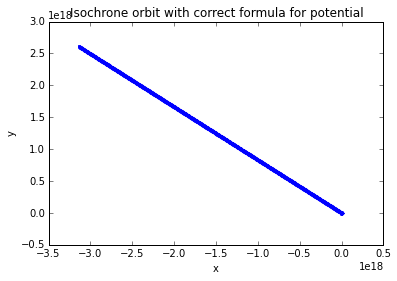

In [18]:
plt.plot(u_ges[:,0],u_ges[:,1],'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Isochrone orbit with correct formula for potential')
#plt.savefig('Isochrone orbit with correct formula for potential')
#plt.ylim(-180,180)

actions
---

Binney&Tremaine page 221

$J_{\phi}=L_z$

$J_{\theta}=L-|L_z|$

$J_r=\frac{1}{\pi} \int_{r_{min}}^{r_{max}}{\mathrm{d}r\sqrt{2E-2\Phi(r)-\frac{L^2}{r^2}}}$

In [19]:
rum=np.sqrt(u_ges[:,0]**2+u_ges[:,1]**2+u_ges[:,2]**2)
phi_u=-cs.G/(b+np.sqrt(b**2+rum**2))
E=1/2*u_ges[:,3]**2+1/2*u_ges[:,4]**2+1/2*u_ges[:,5]**2+phi_u
E_alt=1/2*(np.sqrt(u_ges[:,3]**2+u_ges[:,4]**2+u_ges[:,5]**2)**2)+phi_u
Lx=y*vz-z*vy
Ly=z*vx-x*vz
Lz=x*vy-y*vx

Lxim=yim*vzim-zim*vyim
Lyim=zim*vxim-xim*vzim
Lzim=xim*vyim-yim*vxim

L=np.sqrt(Lx**2+Ly**2+Lz**2)
Lim=np.sqrt(Lxim**2+Lyim**2+Lzim**2)
Lz_abs=np.sqrt(Lzim**2)

#fuer jeden Integrationsschritt
Lxum=u_ges[:,1]*u_ges[:,5]-u_ges[:,2]*u_ges[:,4]
Lyum=u_ges[:,2]*u_ges[:,3]-u_ges[:,0]*u_ges[:,5]
Lzum=u_ges[:,0]*u_ges[:,4]-u_ges[:,1]*u_ges[:,3]

Lzum_abs=np.sqrt(Lzum**2)
Lum=np.sqrt(Lxum**2+Lyum**2+Lzum**2)

In [20]:
pckms=un.pc*un.km/un.s
m2s=un.m*un.m/un.s
print(Lzim,pckms.to(m2s,Lz[ni]),Lz_abs)
print(Lim,pckms.to(m2s,L[ni]))

-1.13984952956e+20 -1.13984952956e+20 1.13984952956e+20
1.43594736188e+20 1.43594736188e+20


In [21]:
#r_min=Lum/(np.sqrt(2*phi_u-2*E))

Jim_phi=Lzim
Jim_theta=Lim-Lz_abs


Jum_phi=Lzum
Jum_theta=Lum-Lzum_abs

#Einheit J: m^2/s

Jupc_phi=m2s.to(pckms,Jum_phi)
Jupc_theta=m2s.to(pckms,Jum_theta)
#Jum_r=1/pi*integrate.quad()

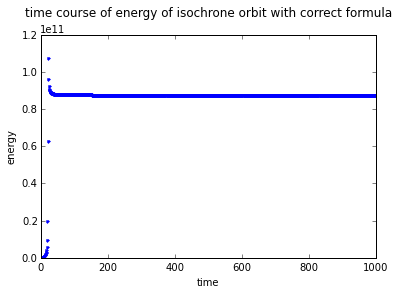

In [22]:
plt.plot(range(int(t_end/h)+1),E,'.')
plt.xlabel('time')
plt.ylabel('energy')
plt.title('time course of energy of isochrone orbit with correct formula',y=1.06)
#plt.savefig('time course of energy of isochrone orbit with correct formula')

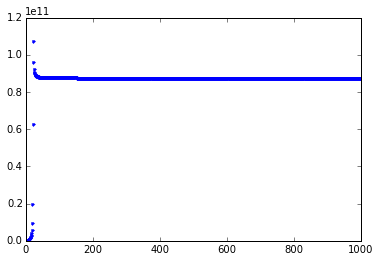

In [23]:
plt.plot(range(int(t_end/h)+1),E_alt,'.')

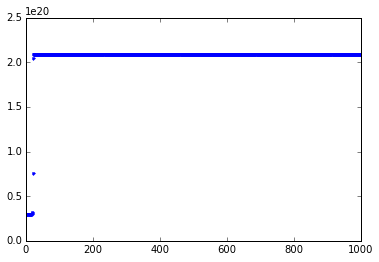

In [24]:
plt.plot(range(int(t_end/h)+1),Jum_theta,'.')


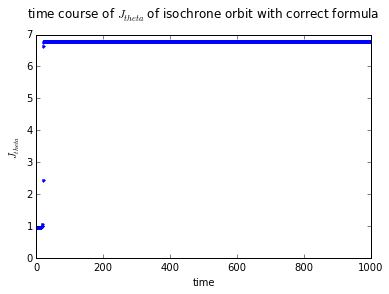

In [25]:
plt.plot(range(int(t_end/h)+1),Jupc_theta,'.')
plt.xlabel('time')
plt.ylabel('$J_{theta}$')
plt.title('time course of $J_{theta}$ of isochrone orbit with correct formula',y=1.05)
#plt.savefig('time course of J_theta of isochrone orbit with correct formula')

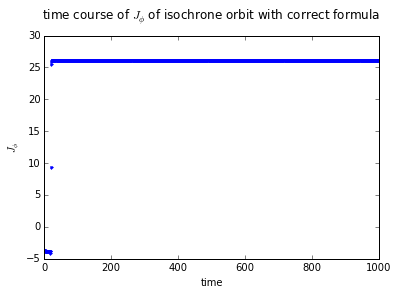

In [26]:
plt.plot(range(int(t_end/h)+1),Jupc_phi,'.')
plt.xlabel('time')
plt.ylabel('$J_{\phi}$')
plt.title('time course of $J_{\phi}$ of isochrone orbit with correct formula',y=1.05)
#plt.savefig('time course of J_phi of isochrone orbit with correct formula')

In [27]:
len(range(int(t_end/h)))


1000